In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier

In [2]:
big5_sc = pd.read_csv('./big5_scored.csv')

In [3]:
big5_sc

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,3,2,3,2,3,2,2,4,2,...,3,4,2,3,3,25,39,36,32,30
19716,2,1,4,1,5,1,1,4,1,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,2,2,3,2,2,1,3,4,1,...,5,5,3,5,5,21,20,38,43,42


In [4]:
E = big5_sc.loc[:, "E1":"E10"]

In [5]:
E.loc[:,"score"] = big5_sc.loc[:,"E_SC"]

C:\Users\ajou\AppData\Local\Temp\ipykernel_12976\3466361353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E.loc[:,"score"] = big5_sc.loc[:,"E_SC"]


In [6]:
E

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,score
0,4,4,5,4,5,5,4,3,5,5,44
1,2,4,3,3,3,3,1,1,1,1,22
2,5,5,1,2,5,5,1,1,5,5,35
3,2,1,2,2,3,2,3,2,4,1,22
4,3,5,3,3,3,5,3,5,3,1,34
...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,21
19715,2,3,2,3,2,3,2,2,4,2,25
19716,2,1,4,1,5,1,1,4,1,1,21
19717,1,2,2,3,2,2,1,3,4,1,21


In [7]:
categorys = []
for val in E['score']:
    if val < 30:
        category = 0
    else:
        category = 1
    categorys.append(category)
    
E['C'] = categorys

C:\Users\ajou\AppData\Local\Temp\ipykernel_12976\388496684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E['C'] = categorys


In [8]:
E

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,score,C
0,4,4,5,4,5,5,4,3,5,5,44,1
1,2,4,3,3,3,3,1,1,1,1,22,0
2,5,5,1,2,5,5,1,1,5,5,35,1
3,2,1,2,2,3,2,3,2,4,1,22,0
4,3,5,3,3,3,5,3,5,3,1,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,21,0
19715,2,3,2,3,2,3,2,2,4,2,25,0
19716,2,1,4,1,5,1,1,4,1,1,21,0
19717,1,2,2,3,2,2,1,3,4,1,21,0


In [9]:
E_train_X, E_train_y = E.iloc[:int(len(E.index)*0.8), :-2], E.iloc[:int(len(E.index)*0.8), -1]
E_test_X, E_test_y = E.iloc[int(len(E.index)*0.8):, :-2], E.iloc[int(len(E.index)*0.8):, -1]
E_test_X = E_test_X.reset_index(drop=True)

In [10]:
E_classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
E_classifier.fit(E_train_X, E_train_y)

E_train_score = E_classifier.score(E_train_X, E_train_y)
print(E_train_score)

E_score = E_classifier.score(E_test_X, E_test_y)
print(E_score)

0.9989223454833598
0.9619675456389453


In [11]:
E_train_y_pred = E_classifier.predict(E_train_X)
print('총 학습 개수 : %d, 오류개수 : %d' %(len(E_train_y), (E_train_y != E_train_y_pred).sum()))
print('정확도 : %.2f' %((len(E_train_y) - (E_train_y != E_train_y_pred).sum()) / len(E_train_y)))

총 학습 개수 : 15775, 오류개수 : 17
정확도 : 1.00


In [12]:
E_y_pred = E_classifier.predict(E_test_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(E_test_y), (E_test_y != E_y_pred).sum()))
print('정확도 : %.2f' %((len(E_test_y) - (E_test_y != E_y_pred).sum()) / len(E_test_y)))

총 테스트 개수 : 3944, 오류개수 : 150
정확도 : 0.96


feature ranking:
1. feature E7 (0.270)
2. feature E5 (0.179)
3. feature E10 (0.091)
4. feature E1 (0.084)
5. feature E4 (0.077)
6. feature E2 (0.072)
7. feature E9 (0.065)
8. feature E6 (0.061)
9. feature E3 (0.051)
10. feature E8 (0.051)


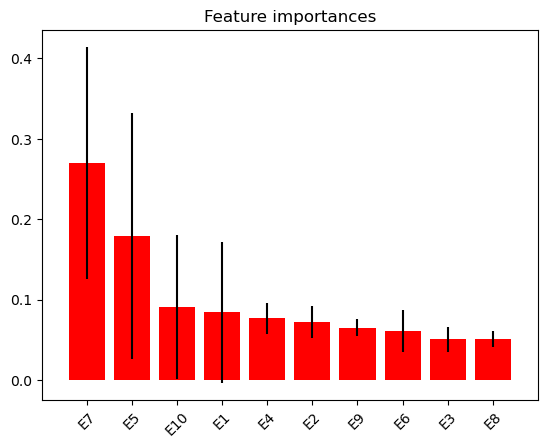

In [14]:
importances = E_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in E_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("feature ranking:")

for f in range(len(E_train_X.columns)):
    print("{}. feature {} ({:.3f})".format(f+1, E_train_X.columns[indices][f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(E_train_X.columns)), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(len(E_train_X.columns)), E_train_X.columns[indices], rotation = 45)
plt.xlim([-1, len(E_train_X.columns)])
plt.show()

In [15]:
random.seed(0)
shuffled_scores = {}

for feature in E_train_X.columns:
    copy = E_train_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = E_classifier.score(copy, E_train_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'E1': 0.9586687797147385, 'E2': 0.9501109350237718, 'E3': 0.9646275752773376, 'E4': 0.9540412044374009, 'E5': 0.9465610142630745, 'E6': 0.9638668779714739, 'E7': 0.93743264659271, 'E8': 0.9615213946117274, 'E9': 0.9471949286846276, 'E10': 0.9539778129952456}


In [16]:
print("Original Classfication Accuracy : %.4f"%E_train_score)
for n in range(len(E_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[E_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9989
1 high importance shuffled Accuracy : 0.9374
2 high importance shuffled Accuracy : 0.9466
3 high importance shuffled Accuracy : 0.9540
4 high importance shuffled Accuracy : 0.9587
5 high importance shuffled Accuracy : 0.9540
6 high importance shuffled Accuracy : 0.9501
7 high importance shuffled Accuracy : 0.9472
8 high importance shuffled Accuracy : 0.9639
9 high importance shuffled Accuracy : 0.9646
10 high importance shuffled Accuracy : 0.9615


In [17]:
random.seed(0)
shuffled_scores = {}

for feature in E_test_X.columns:
    copy = E_test_X.copy()
    random.shuffle(copy.loc[:, feature])
    
    shuffled_score = E_classifier.score(copy, E_test_y)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

{'E1': 0.9444726166328601, 'E2': 0.9381338742393509, 'E3': 0.9467545638945233, 'E4': 0.9350912778904665, 'E5': 0.9396551724137931, 'E6': 0.9366125760649088, 'E7': 0.933316430020284, 'E8': 0.9406693711967545, 'E9': 0.9317951318458418, 'E10': 0.9312880324543611}


In [18]:
print("Original Classfication Accuracy : %.4f"%E_score)
for n in range(len(E_train_X.columns)):
    print("%s high importance shuffled Accuracy : %.4f" %(n+1, shuffled_scores[E_train_X.columns[indices][n]]))

Original Classfication Accuracy : 0.9620
1 high importance shuffled Accuracy : 0.9333
2 high importance shuffled Accuracy : 0.9397
3 high importance shuffled Accuracy : 0.9313
4 high importance shuffled Accuracy : 0.9445
5 high importance shuffled Accuracy : 0.9351
6 high importance shuffled Accuracy : 0.9381
7 high importance shuffled Accuracy : 0.9318
8 high importance shuffled Accuracy : 0.9366
9 high importance shuffled Accuracy : 0.9468
10 high importance shuffled Accuracy : 0.9407


In [23]:
E2_se_train_X = E_train_X.copy()
E2_se_train_X = E2_se_train_X.loc[:, ["E7", "E5"]]

E2_se_test_X = E_test_X.copy()
E2_se_test_X = E2_se_test_X.loc[:, ["E7", "E5"]]
E2_se_test_X = E2_se_test_X.reset_index(drop=True)

E2_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
E2_se_classifier.fit(E2_se_train_X, E_train_y)

E2_se_score = E2_se_classifier.score(E2_se_train_X, E_train_y)
print(E2_se_score)

E2_se_test_score = E2_se_classifier.score(E2_se_test_X, E_test_y)
print(E2_se_test_score)

0.8510935023771791
0.8460953346855984


In [24]:
E3_se_train_X = E_train_X.copy()
E3_se_train_X = E3_se_train_X.loc[:, ["E7", "E5", "E10"]]

E3_se_test_X = E_test_X.copy()
E3_se_test_X = E3_se_test_X.loc[:, ["E7", "E5", "E10"]]
E3_se_test_X = E3_se_test_X.reset_index(drop=True)

E3_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
E3_se_classifier.fit(E3_se_train_X, E_train_y)

E3_se_score = E3_se_classifier.score(E3_se_train_X, E_train_y)
print(E3_se_score)

E3_se_test_score = E3_se_classifier.score(E3_se_test_X, E_test_y)
print(E3_se_test_score)

0.8748019017432647
0.8739858012170385


In [27]:
E4_se_train_X = E_train_X.copy()
E4_se_train_X = E4_se_train_X.loc[:, ["E5", "E7", "E10", "E1"]]

E4_se_test_X = E_test_X.copy()
E4_se_test_X = E4_se_test_X.loc[:, ["E5", "E7", "E10", "E1"]]
E4_se_test_X = E4_se_test_X.reset_index(drop=True)

E4_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
E4_se_classifier.fit(E4_se_train_X, E_train_y)

E4_se_score = E4_se_classifier.score(E4_se_train_X, E_train_y)
print(E4_se_score)

E4_se_test_score = E4_se_classifier.score(E4_se_test_X, E_test_y)
print(E4_se_test_score)

0.8948335974643423
0.8902129817444219


In [28]:
E5_se_train_X = E_train_X.copy()
E5_se_train_X = E5_se_train_X.loc[:, ["E5", "E7", "E10", "E1", "E4"]]

E5_se_test_X = E_test_X.copy()
E5_se_test_X = E5_se_test_X.loc[:, ["E5", "E7", "E10", "E1", "E4"]]
E5_se_test_X = E5_se_test_X.reset_index(drop=True)

E5_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
E5_se_classifier.fit(E5_se_train_X, E_train_y)

E5_se_score = E5_se_classifier.score(E5_se_train_X, E_train_y)
print(E5_se_score)

E5_se_test_score = E5_se_classifier.score(E5_se_test_X, E_test_y)
print(E5_se_test_score)

0.9246275752773375
0.9039046653144016


In [30]:
E6_se_train_X = E_train_X.copy()
E6_se_train_X = E6_se_train_X.loc[:, ["E5", "E7", "E10", "E1", "E4", "E2"]]

E6_se_test_X = E_test_X.copy()
E6_se_test_X = E6_se_test_X.loc[:, ["E5", "E7", "E10", "E1", "E4", "E2"]]
E6_se_test_X = E6_se_test_X.reset_index(drop=True)

E6_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
E6_se_classifier.fit(E6_se_train_X, E_train_y)

E6_se_score = E6_se_classifier.score(E6_se_train_X, E_train_y)
print(E6_se_score)

E6_se_test_score = E6_se_classifier.score(E6_se_test_X, E_test_y)
print(E6_se_test_score)

0.9525198098256735
0.9112576064908722


In [31]:
E7_se_train_X = E_train_X.copy()
E7_se_train_X = E7_se_train_X.loc[:, ["E5", "E7", "E10", "E1", "E4", "E2", "E9"]]

E7_se_test_X = E_test_X.copy()
E7_se_test_X = E7_se_test_X.loc[:, ["E5", "E7", "E10", "E1", "E4", "E2", "E9"]]
E7_se_test_X = E7_se_test_X.reset_index(drop=True)

E7_se_classifier = RandomForestClassifier(n_estimators = 10, random_state=0)
E7_se_classifier.fit(E7_se_train_X, E_train_y)

E7_se_score = E7_se_classifier.score(E7_se_train_X, E_train_y)
print(E7_se_score)

E7_se_test_score = E7_se_classifier.score(E7_se_test_X, E_test_y)
print(E7_se_test_score)

0.9802852614896989
0.9363590263691683


7